#  <center><font color = 'black'> Simulations and Linear Programming</font></center>

## <font color = 'Green'> Section 1 : Introduction</font>

### Overview of this document

The purpose of this jupyter notebook document is to deliver the hands-on sections of the Computational Modeling and Analytics course. It consists of a mix of tutorial style and self-learning sections. 

By the end of working through this document, students should have an understanding of the following: 

1. Solving a linear programming problem using packages such as lpsolve
2. Developing optimisation models using different algorithms (e.g. Simplex)

### Jupyter shortcuts to help along

Tip: Keep Practising! 

## First things first

Let's try the classic Hello world first (true to coding tradition)

In [7]:
print("Dajia hao")

Dajia hao


## Python libraries for data analysis

There is a robust set of libraries supporting data engineering and analysis in Python

In [8]:
import pandas as pd # Data processing library
import numpy as np # Numeric and math functions
import matplotlib # Chart and Graph Library
import sklearn # Machine learning library

## <font color = 'Green'> Section 2 : Introduction to Simulation in Python </font>

### 2.1 An example of deterministic simulation

<b>Financial simulations</b>

Try this: 
    
Calculate the final depreciated value of an initially $10,000 car which declines in value by 3% per year for 10 years:

$10,000∗(1+−0.03)10=$7,374.24

Or simply use numpy's fv function

In [9]:
import numpy as np
import numpy_financial as npf
npf.fv(rate=-0.03, nper=10, pmt=0, pv=-10000)

7374.241268949281

In [10]:
?npf.fv

### 2.2 Introduction to probabilistic simulation 

An informal introduction to Monte Carlo simulations: 

The key underlying idea is to use emperical observations (with a high enough number of trials) to solve an otherwise deterministic problem. Let us use understand this concept via simulation of a random walk. 

<b>Objective:</b> If someone takes a hundred steps, how far are they likely to be from the starting point?

<b>Function: <font color = red>random.choice() </font></b>

In [11]:
import random

Simulating a walk where a step can be taken in either of 8 directions : N, S, E, W, NE, NW, SE, SW

In [12]:
def random_walk(n):    #name of our new function - n is argument, i.e what we give to the function
    x, y = 0, 0        #x and y are variables and we are assigning values to them
    for i in range(n): # for loop, that says - do this n times
        
        step = random.choice(['N', 'S', 'E', 'W', 'NE', 'NW', 'SE', 'SW']) #select a choice at random
        if step == 'N':
            y+=1
        elif step == 'S':
            y-=1
        elif step == 'E':
            x+=1
        elif step == 'W':
            x-=1
        elif step == 'NE':
            x+=1
            y+=1
        elif step == 'NW':
            x-=1
            y+=1
        elif step == 'SE':
            x+=1
            y-=1
        elif step == 'SW':
            x-=1
            y-=1
            
    return (x,y)

In [13]:
import numpy as np
number_of_runs = 20000
dist_away = np.array([])

for i in range(number_of_runs):
    x, y = random_walk(100)
    manh_dis = np.sqrt(x**2 + y**2)
    dist_away = np.append(dist_away, [manh_dis])

In [14]:
print(dist_away)

[11.18033989 13.45362405  1.41421356 ... 11.04536102 27.31300057
  7.07106781]


In [15]:
np.histogram(dist_away)

(array([1943, 5287, 5391, 3912, 2206,  897,  286,   65,   12,    1],
       dtype=int64),
 array([ 0.        ,  4.0607881 ,  8.1215762 , 12.1823643 , 16.2431524 ,
        20.3039405 , 24.36472861, 28.42551671, 32.48630481, 36.54709291,
        40.60788101]))

In [16]:
?np.histogram

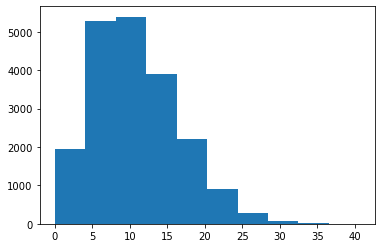

In [17]:
# print number_of_runs = 20000
from matplotlib import pyplot as plt 
plt.hist(dist_away)
plt.show()

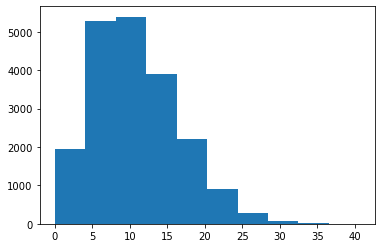

In [18]:
# print number_of_runs = 10000

from matplotlib import pyplot as plt 
plt.hist(dist_away)
plt.show()

In [19]:
dist_away.astype(int)

array([11, 13,  1, ..., 11, 27,  7])

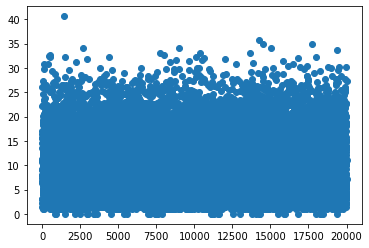

In [20]:
plt.scatter(range(0,len(dist_away)),dist_away)
plt.show()

In [21]:
?plt.scatter

<b>Real world application:</b> crowd control, movement of people 

<b>AnyLogic Video</b>

AnyLogic is a simulation software that supports simulations for different industries/domains

https://www.anylogic.com/resources/educational-videos/introduction-to-anylogic-software/

## <font color = 'Green'> Section 3 : Optimisation and linear programming in python </font>

### The Problem - Profit Maximization


A pharmaceutical company can produce two types of drug by three different processes. Each process requires the use of a chemical catalyst X which is in very limited supply. which products should the chemical catalyst be focusing on?

<i> This can be solved as a linear programming problem! </i>

### Linear Programming in Excel

Excel's solver can be used to solve linear programming problems. Additionally, there are add-ons which make it simpler to solve. There are built-in solver in Excel or open source. To understand more about open source solvers, have a look at the below:

<i>For your reading, if you're curious: </i> https://sourceforge.net/projects/opensolver/ 

### Linear Programming in Python

<b><font color = red>PuLP Package for Linear Programming</b>

Pulp is an open source package which can be used for linear programming and integer programming

There are some standard steps that can be followed to define and solve a linear programming problem - let's try to solve the problem above and learn these steps along the way

<b> Step 1: Import the package

Go to Start and search for Anaconda Powershell Prompt (Anaconda3). Once you see the black command prompt screen, type the following:

pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pulp

Once you see the success message, come back to Jupyter Notebook and run the following code:

**conda install -c conda-forge pulp** <- use this to import the package at Anaconda Prompt (Anaconda3), the method is different with the above mentioned

In [31]:
from pulp import * 

<b> Step 2: Define the linear programming problem </b>

<b>Function: LpProblem (<i> name, sense </i>)</b>

Used to assign a name to an optimisation problem (argument : name) and specify whether it is going to be a minimisation or maximisation problem (argument : sense, can take values - LpMinimize (default) or LpMaximise)


In [23]:
?LpProblem

In [32]:
optProblem = LpProblem("Project_Pharmaceutical", LpMaximize)

<b>Step 3: Define the decision variables</b>

The decision variables here are the quantities of drugs that should be produced for each drug type. So we define those now

<b>Function: LpVariable (<i> name, lowBound = None, upBound = None, cat = 'Continuous', e = None </i>) </b>

name – The name of the variable

lowbound – The lower bound on this variable’s range (bound value is included in range). Default is negative infinity

upBound – The upper bound on this variable’s range (bound value is included in range). Default is positive infinity

cat – The category this variable is in, Integer, Binary or Continuous(default)

e – Used for column based modelling: relates to the variable’s existence in the objective function and constraints

In [27]:
?LpInteger

In [33]:
D1 = LpVariable("Drug 1",0,None,LpInteger)                  #Hours cannot be negative
D2 = LpVariable("Drug 2", 0, None, LpInteger) 

<b>Step 4: Define the objective function</b>

In our problem, our objective is to minimise the budget. For that, we need to define the budget as a function of the decision variables 
(i.e, the total number of hours that are required for each grade of developer)

In [34]:
optProblem+= 3*D1 + 5*D2  # += means adding to the function

<b>Step 5: Define the constraints

In [35]:
optProblem+= D1*1 <= 4 # Process 1 Constraint
optProblem+= D1*3 + D2*2 <= 18 # Process 2 Constraint
optProblem+= D2*2 <= 12 # Process 3 Constraint

<b>Step 6: Solve in one line</b>

In [36]:
optProblem.solve()

1

<b>Step 7: Study the output

In [39]:
print("Status:", LpStatus[optProblem.status])

Status: Optimal


In [41]:
for v in optProblem.variables():
    print(v.name, "=", v.varValue)

Drug_1 = 2
Drug_2 = 6


In [42]:
print("Maximum Profit = ", value(optProblem.objective))

Maximum Profit =  36


# Going back to the original question: which products should the chemical catalyst be focusing on?
# We should focus on to develop 2 Drug_1 and 6 Drug_2 which can bring the maximum profit at 36.